<a href="https://www.kaggle.com/code/mohamedbakrey/classification-for-zoo-animals-by-random-forest?scriptVersionId=99252341" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

![ANIMAL](https://www.bing.com/th?id=ATOOL18D070A03F88920CF1BFA4AE569532076ACE32F0ED657AF563BBC0C89D6805FB&w=296&h=176&c=1&rs=2&o=6&pid=SANGAM)

## Import libraries

In [80]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.offline as py
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.datasets import make_classification
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import mean_absolute_error 
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_fscore_support

## Read Data

In [81]:
df=pd.read_csv('../input/zoo-animals-extended-dataset/zoo2.csv')
df2=pd.read_csv('../input/zoo-animals-extended-dataset/zoo3.csv')

df.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
3,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
5,python,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
6,boa,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,3
7,adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
8,crocodile,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3
9,alligator,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3


In [82]:
df2.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,anta,1,0,0,1,0,0,0,1,1,1,0,0,4,0,0,0,1
1,ariranha,1,0,0,1,0,1,1,1,1,1,0,1,4,1,0,0,1
2,boto-cor-de-rosa,0,0,0,1,0,1,1,1,1,1,0,1,0,1,0,0,1
3,bugio,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,0,1
4,cachorro-vinagre,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
5,chimpanze,1,0,0,1,0,0,1,1,1,1,0,0,4,1,1,0,1
6,gato-maracaja,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
7,jaguatirica,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
8,lobo-guara,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,0,1
9,macaco-aranha,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [83]:
print("Shape of data1", df.shape)
print("Shape of data2",df2.shape)

Shape of data1 (43, 18)
Shape of data2 (70, 18)


### Make concatnation for two dataset file

In [84]:
df3=pd.concat([df, df2], ignore_index=True)

In [85]:
df3.head(10)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,turtle,0,0,1,0,0,1,0,0,1,1,0,0,4,1,1,1,3
1,chameleon,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
2,iguana,0,0,1,0,0,0,1,1,1,1,0,0,4,1,1,1,3
3,lizard,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3
4,gecko,0,0,1,0,0,0,0,1,1,1,0,0,4,1,1,0,3
5,python,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
6,boa,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,1,3
7,adder,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,1,3
8,crocodile,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3
9,alligator,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,1,3


In [86]:
df3.shape

(113, 18)

In [87]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113 entries, 0 to 112
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   animal_name  113 non-null    object
 1   hair         113 non-null    int64 
 2   feathers     113 non-null    int64 
 3   eggs         113 non-null    int64 
 4   milk         113 non-null    int64 
 5   airborne     113 non-null    int64 
 6   aquatic      113 non-null    int64 
 7   predator     113 non-null    int64 
 8   toothed      113 non-null    int64 
 9   backbone     113 non-null    int64 
 10  breathes     113 non-null    int64 
 11  venomous     113 non-null    int64 
 12  fins         113 non-null    int64 
 13  legs         113 non-null    int64 
 14  tail         113 non-null    int64 
 15  domestic     113 non-null    int64 
 16  catsize      113 non-null    int64 
 17  class_type   113 non-null    int64 
dtypes: int64(17), object(1)
memory usage: 16.0+ KB


In [88]:
df3.describe().style.background_gradient(cmap = "magma")

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000,113.000000
mean,0.203540,0.176991,0.831858,0.168142,0.256637,0.380531,0.389381,0.469027,0.761062,0.849558,0.132743,0.159292,2.955752,0.619469,0.132743,0.336283,3.637168
std,0.404424,0.383361,0.375658,0.375658,0.438723,0.487680,0.489782,0.501263,0.428334,0.359097,0.340809,0.367578,2.221604,0.487680,0.340809,0.474541,1.950558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,3.000000
75%,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,5.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [89]:
df3.isna().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

## Make EDA for data

3    20
2    20
1    19
6    17
4    15
5    12
7    10
Name: class_type, dtype: int64


Text(0.5, 1.0, 'The Distribution of Classes')

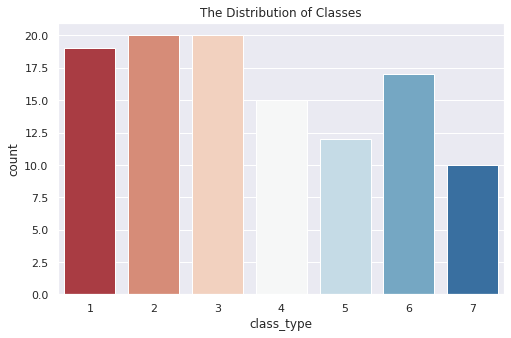

In [90]:
print(df3['class_type'].value_counts())
sns.countplot(data = df3, x = "class_type", palette = "RdBu")
plt.title("The Distribution of Classes")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



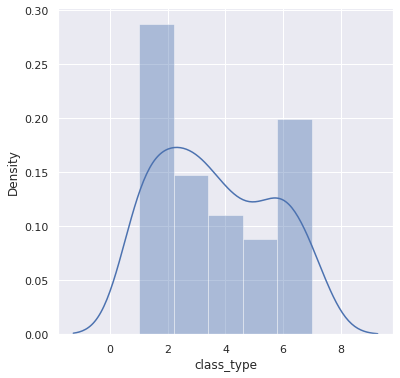

In [91]:
plt.figure(figsize=(6,6))
sns.distplot(df3['class_type'])
plt.show()

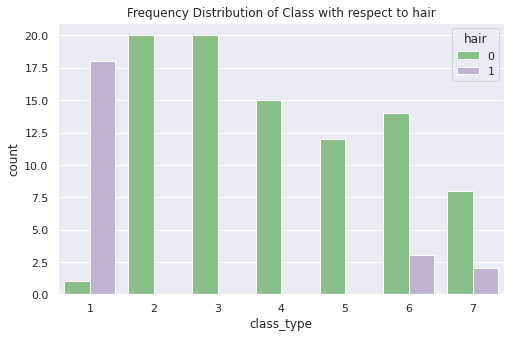

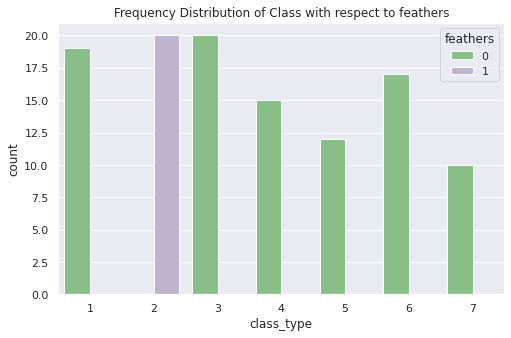

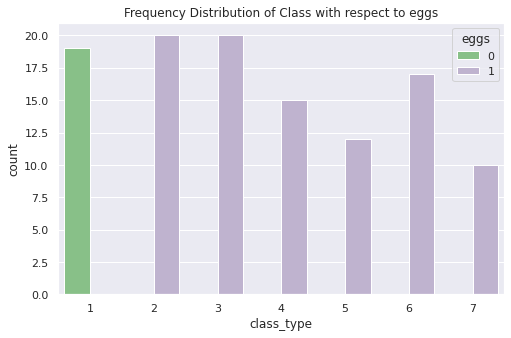

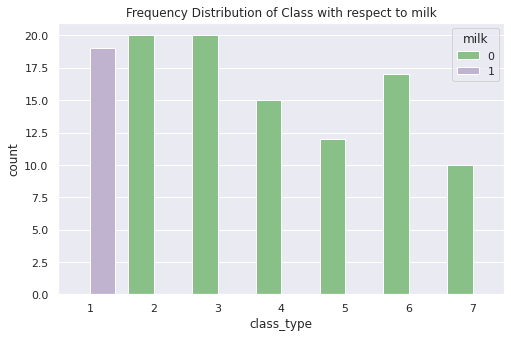

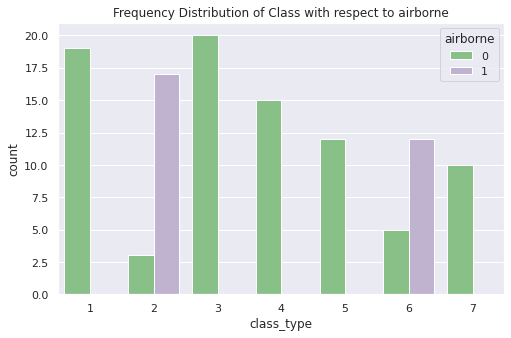

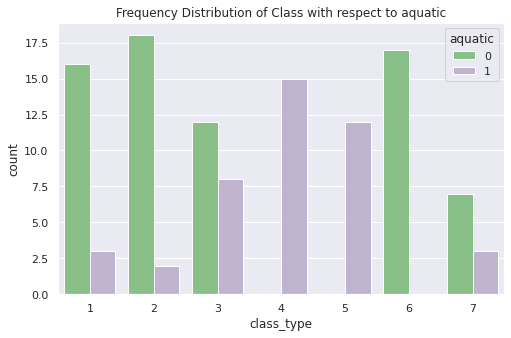

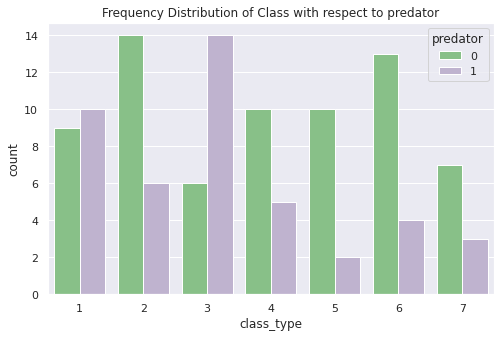

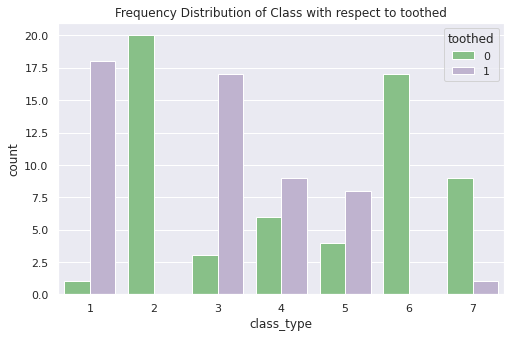

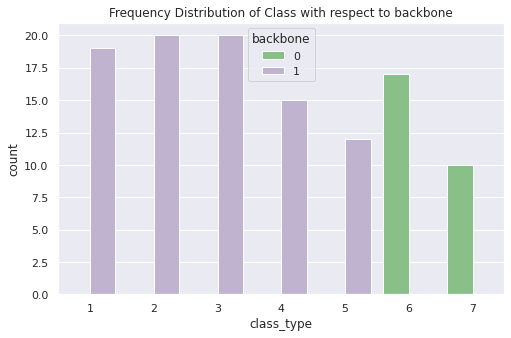

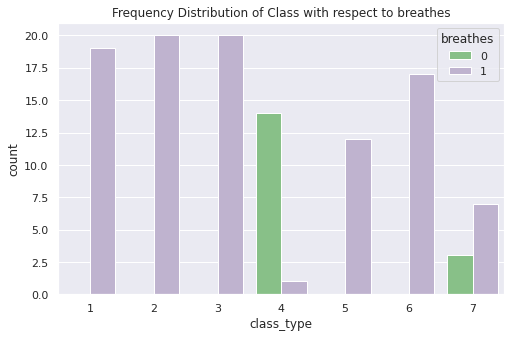

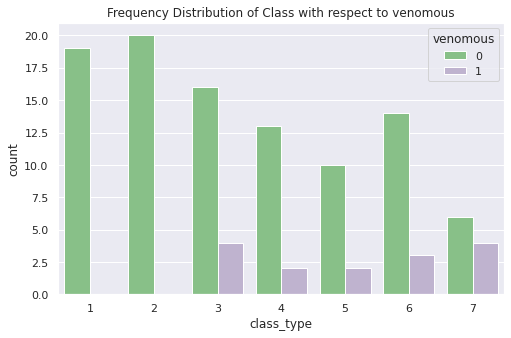

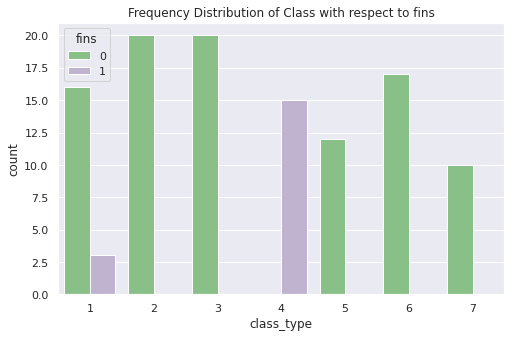

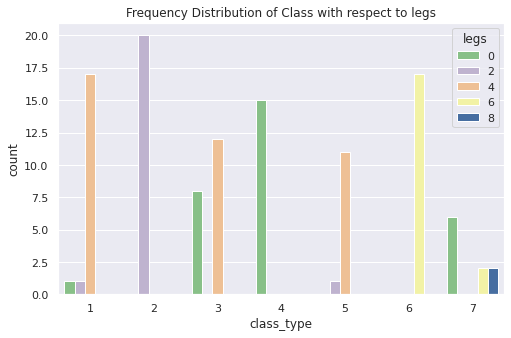

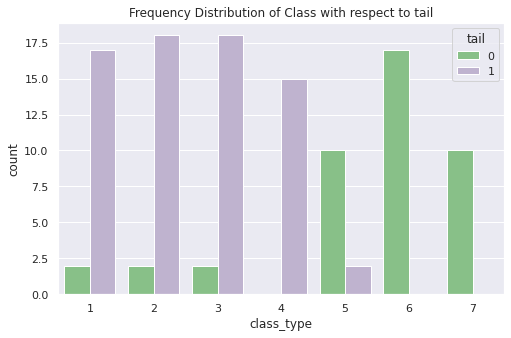

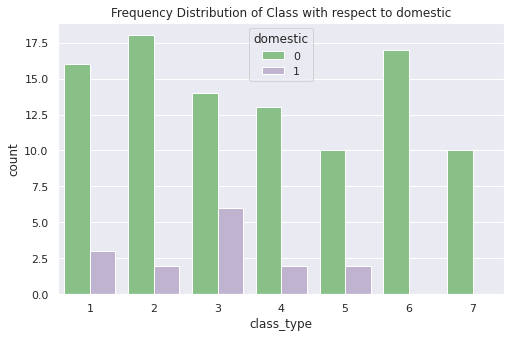

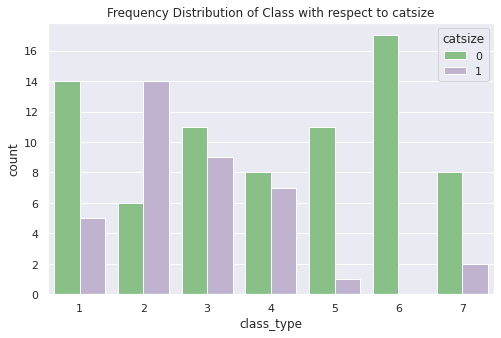

In [92]:
for i in ['hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize']:
    sns.countplot(data = df3, x = "class_type", hue = i, palette = "Accent")
    plt.title(f"Frequency Distribution of Class with respect to {i}")
    plt.show()

<AxesSubplot:>

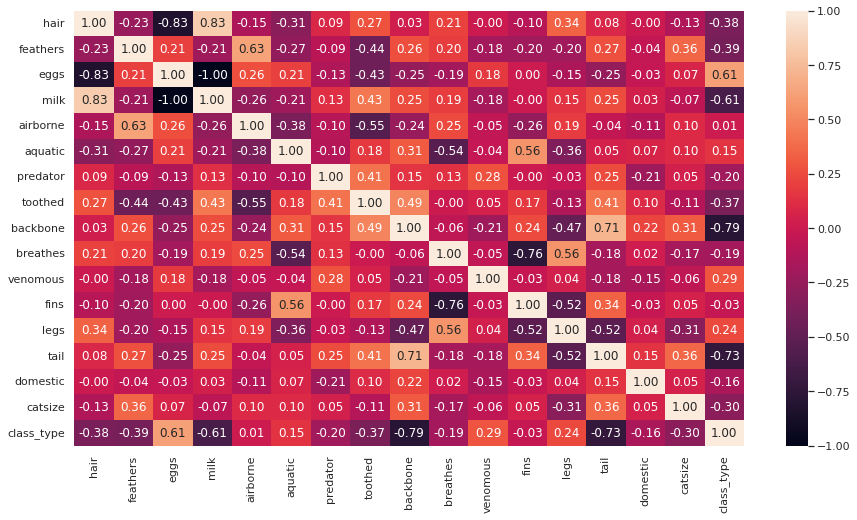

In [93]:
corr = df3.corr()
sns.set(rc = {"figure.figsize": (15, 8)})

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, fmt = ".2f")

In [94]:
df3.columns

Index(['animal_name', 'hair', 'feathers', 'eggs', 'milk', 'airborne',
       'aquatic', 'predator', 'toothed', 'backbone', 'breathes', 'venomous',
       'fins', 'legs', 'tail', 'domestic', 'catsize', 'class_type'],
      dtype='object')

In [95]:
px.scatter(df3, x="domestic", y="hair", color="animal_name")

In [96]:
px.sunburst(df3, path=['animal_name','hair'], values='class_type')

In [97]:
px.histogram(df3, x="animal_name", y="hair", color="class_type")

In [98]:
px.parallel_coordinates(df3, color="class_type",) 

# Using The ML Model

In [99]:
x=df.drop(['animal_name','class_type'],axis=1)
y=df['class_type']

In [100]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## RandomForestClassifier

In [101]:
# Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [102]:
# Predicting a new result
y_pred=classifier.predict(X_test)
y_pred

array([6, 6, 6, 3, 3, 6, 6, 3, 7])

### Evaluate the model

In [103]:
print('model_xgb Train Score is : ' , classifier.score(X_train, y_train))
print('model_xgb Test Score is : ' , classifier.score(X_test, y_test))

model_xgb Train Score is :  1.0
model_xgb Test Score is :  1.0


In [104]:
confusion_matrix=confusion_matrix(y_test,y_pred)
confusion_matrix

array([[3, 0, 0],
       [0, 5, 0],
       [0, 0, 1]])

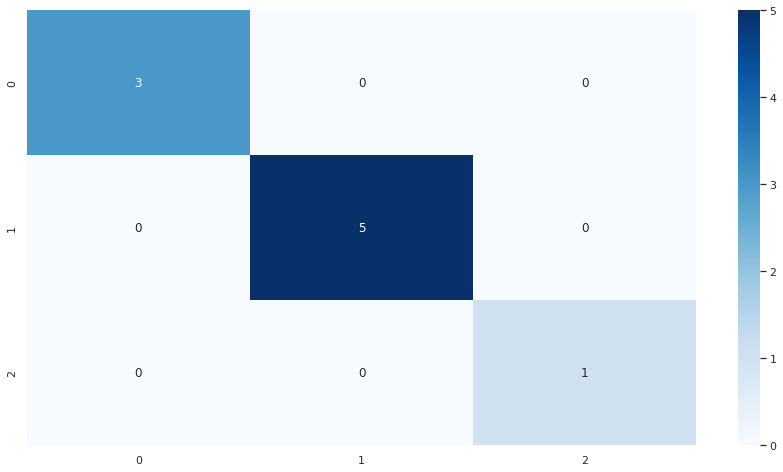

In [107]:

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
## Display the visualization of the Confusion Matrix.
plt.show()

In [108]:
total=sum(sum(cf_matrix))

sensitivity = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = cf_matrix[1,1]/(cf_matrix[1,1]+cf_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  1.0
Specificity :  1.0


In [109]:
total=sum(sum(cf_matrix))

ppv = cf_matrix[0,0]/(cf_matrix[0,0]+cf_matrix[0,1])
print('ppv : ', ppv )

npv = cf_matrix[1,1]/(cf_matrix[1,0]+cf_matrix[1,1])
print('npv : ', npv)

ppv :  1.0
npv :  1.0


In [110]:
#Calculating F1 Score  : 2 * (precision * recall) / (precision + recall)
# f1_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)
F1Score = f1_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('F1 Score is : ', F1Score)

F1 Score is :  1.0


In [111]:
#Calculating Recall Score : (Sensitivity) (TP / float(TP + FN))   1 / 1+2  
# recall_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’, sample_weight=None)
RecallScore = recall_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Recall Score is : ', RecallScore)

Recall Score is :  1.0


In [112]:
#Calculating Precision Score : (Specificity) #(TP / float(TP + FP))  
# precision_score(y_true, y_pred, labels=None, pos_label=1, average=’binary’,sample_weight=None)
PrecisionScore = precision_score(y_test, y_pred, average='micro') #it can be : binary,macro,weighted,samples
print('Precision Score is : ', PrecisionScore)

Precision Score is :  1.0


In [113]:
#Calculating Precision recall Score :  
#metrics.precision_recall_fscore_support(y_true, y_pred, beta=1.0, labels=None, pos_label=1, average=
#                                        None, warn_for = ('precision’,’recall’, ’f-score’), sample_weight=None)
PrecisionRecallScore = precision_recall_fscore_support(y_test, y_pred
                                                       , average='micro') #it can be : binary,macro,weighted,samples
print('Precision Recall Score is : ', PrecisionRecallScore)

Precision Recall Score is :  (1.0, 1.0, 1.0, None)


In [117]:
#Calculating Mean Absolute Error
MAEValue = mean_absolute_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Absolute Error Value is : ', MAEValue)

Mean Absolute Error Value is :  0.0


In [118]:
#Calculating Mean Squared Error
MSEValue = mean_squared_error(y_test, y_pred, multioutput='uniform_average') # it can be raw_values
print('Mean Squared Error Value is : ', MSEValue)
#----------------------------------------------------
#Calculating Median Squared Error
MdSEValue = median_absolute_error(y_test,y_pred)
print('Median Squared Error Value is : ', MdSEValue )

Mean Squared Error Value is :  0.0
Median Squared Error Value is :  0.0
